#Dependencies:

In [1]:
!pip install python-sat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 


In [2]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=671e9148bee6e8d2e124e16208cdfada414ddefa951bec0e1dea3c96b2a482eb
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


#Imports:

In [156]:
from pysat.solvers import Minisat22
import random
from itertools import combinations
from colorama import Fore
from tabulate import tabulate
import emoji
from IPython import display 

#Part 1: Logic Implementation

##$$Game \: setting:$$

In [5]:
n = 8
length = n + 2
size = length**2
states = [i for i in range(11)]

##$$List \: of \: Possible \: States:$$

$$I_0 => 0 : Zero \: bomb \: around$$ 
$$I_1 => 1 : One \: bomb \: around$$ 
$$I_2 => 2 : Two \: bombs \: around$$ 
$$I_3 => 3 : Three \: bombs \: around$$ 
$$I_4 => 4 : Four \: bombs \: around$$ 
$$I_5 => 5 : Five \: bombs \: around$$ 
$$I_6 => 6 : Six \: bombs \: around$$ 
$$I_7 => 7 : Seven \: bombs \: around$$ 
$$I_8 => 8 : Eight \: bombs \: around$$ 
$$D => 9 : Disable$$ 
$$B => 10 : Bomb$$ 

In [6]:
def IN(n,r,c):
    return n*length**2 + r*length + c + 1

for N in range(11):
    for r in range(length):
        for c in range(length):
            print("IN({},{},{}) ----> {}".format(N,r,c,IN(N,r,c)))

IN(0,0,0) ----> 1
IN(0,0,1) ----> 2
IN(0,0,2) ----> 3
IN(0,0,3) ----> 4
IN(0,0,4) ----> 5
IN(0,0,5) ----> 6
IN(0,0,6) ----> 7
IN(0,0,7) ----> 8
IN(0,0,8) ----> 9
IN(0,0,9) ----> 10
IN(0,1,0) ----> 11
IN(0,1,1) ----> 12
IN(0,1,2) ----> 13
IN(0,1,3) ----> 14
IN(0,1,4) ----> 15
IN(0,1,5) ----> 16
IN(0,1,6) ----> 17
IN(0,1,7) ----> 18
IN(0,1,8) ----> 19
IN(0,1,9) ----> 20
IN(0,2,0) ----> 21
IN(0,2,1) ----> 22
IN(0,2,2) ----> 23
IN(0,2,3) ----> 24
IN(0,2,4) ----> 25
IN(0,2,5) ----> 26
IN(0,2,6) ----> 27
IN(0,2,7) ----> 28
IN(0,2,8) ----> 29
IN(0,2,9) ----> 30
IN(0,3,0) ----> 31
IN(0,3,1) ----> 32
IN(0,3,2) ----> 33
IN(0,3,3) ----> 34
IN(0,3,4) ----> 35
IN(0,3,5) ----> 36
IN(0,3,6) ----> 37
IN(0,3,7) ----> 38
IN(0,3,8) ----> 39
IN(0,3,9) ----> 40
IN(0,4,0) ----> 41
IN(0,4,1) ----> 42
IN(0,4,2) ----> 43
IN(0,4,3) ----> 44
IN(0,4,4) ----> 45
IN(0,4,5) ----> 46
IN(0,4,6) ----> 47
IN(0,4,7) ----> 48
IN(0,4,8) ----> 49
IN(0,4,9) ----> 50
IN(0,5,0) ----> 51
IN(0,5,1) ----> 52
IN(0,5,2) ----> 53
IN

In [7]:
mine_sw = Minisat22()

##$$The \: first \: row \: is \: disable:$$
$$\bigwedge_{c=0}^{n+1}in(9,0,c)$$

In [8]:
j=1
for c in range(length):
        clause = [IN(9, 0, c)]
        print(j,"=>","adding",clause)
        mine_sw.add_clause(clause)
        j+=1

1 => adding [901]
2 => adding [902]
3 => adding [903]
4 => adding [904]
5 => adding [905]
6 => adding [906]
7 => adding [907]
8 => adding [908]
9 => adding [909]
10 => adding [910]


##$$The \: first \: column \: is \: disable:$$
$$\bigwedge_{r=0}^{n+1}in(9,r,0)$$

In [9]:
for r in range(1, length):
        clause = [IN(9, r, 0)]
        print(j,"=>","adding",clause)
        mine_sw.add_clause(clause)
        j+=1

11 => adding [911]
12 => adding [921]
13 => adding [931]
14 => adding [941]
15 => adding [951]
16 => adding [961]
17 => adding [971]
18 => adding [981]
19 => adding [991]


##$$The \: last \: row \: is \: disable:$$
$$\bigwedge_{c=0}^{n+1}in(9,n+1,c)$$

In [10]:
for c in range(1, length):
        clause = [IN(9, length-1, c)]
        print(j,"=>","adding",clause)
        mine_sw.add_clause(clause)
        j+=1

20 => adding [992]
21 => adding [993]
22 => adding [994]
23 => adding [995]
24 => adding [996]
25 => adding [997]
26 => adding [998]
27 => adding [999]
28 => adding [1000]


##$$The \: last \: column \: is \: disable:$$
$$\bigwedge_{r=0}^{n+1}in(9,r,n+1)$$

In [11]:
for r in range(1, length-1):
        clause = [IN(9, r, length-1)]
        print(j,"=>","adding",clause)
        mine_sw.add_clause(clause)
        j+=1

29 => adding [920]
30 => adding [930]
31 => adding [940]
32 => adding [950]
33 => adding [960]
34 => adding [970]
35 => adding [980]
36 => adding [990]


##$$Original \: cells \: are \: not \: disabled:$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n}\neg in(9,r,c)$$

In [12]:
for r in range(1, length-1):
    for c in range(1, length-1):
        clause = [-IN(9, r, c)]
        print(j,"=>","adding",clause)
        mine_sw.add_clause(clause)
        j+=1

37 => adding [-912]
38 => adding [-913]
39 => adding [-914]
40 => adding [-915]
41 => adding [-916]
42 => adding [-917]
43 => adding [-918]
44 => adding [-919]
45 => adding [-922]
46 => adding [-923]
47 => adding [-924]
48 => adding [-925]
49 => adding [-926]
50 => adding [-927]
51 => adding [-928]
52 => adding [-929]
53 => adding [-932]
54 => adding [-933]
55 => adding [-934]
56 => adding [-935]
57 => adding [-936]
58 => adding [-937]
59 => adding [-938]
60 => adding [-939]
61 => adding [-942]
62 => adding [-943]
63 => adding [-944]
64 => adding [-945]
65 => adding [-946]
66 => adding [-947]
67 => adding [-948]
68 => adding [-949]
69 => adding [-952]
70 => adding [-953]
71 => adding [-954]
72 => adding [-955]
73 => adding [-956]
74 => adding [-957]
75 => adding [-958]
76 => adding [-959]
77 => adding [-962]
78 => adding [-963]
79 => adding [-964]
80 => adding [-965]
81 => adding [-966]
82 => adding [-967]
83 => adding [-968]
84 => adding [-969]
85 => adding [-972]
86 => adding [-973]


##$$There \: is \: atmost \: one \: state \: for \: each \: cell:$$
$$\bigwedge_{r=0}^{n+1}\bigwedge_{c=0}^{n+1}\bigwedge_{s,s'\in{S},s\neq{s'}}\neg (in(s,r,c)∧in(s',r,c))$$

In [13]:
for r in range(length):
    for c in range(length):
        for s1 in range(len(states)):
            for s2 in range(s1+1, len(states)):
                st1, st2 = states[s1], states[s2]
                clause = [-IN(st1, r, c), -IN(st2, r, c)]
                print(j,"=>","adding",clause)
                mine_sw.add_clause(clause)
                j+=1

Streaming output truncated to the last 5000 lines.
601 => adding [-10, -610]
602 => adding [-10, -710]
603 => adding [-10, -810]
604 => adding [-10, -910]
605 => adding [-10, -1010]
606 => adding [-110, -210]
607 => adding [-110, -310]
608 => adding [-110, -410]
609 => adding [-110, -510]
610 => adding [-110, -610]
611 => adding [-110, -710]
612 => adding [-110, -810]
613 => adding [-110, -910]
614 => adding [-110, -1010]
615 => adding [-210, -310]
616 => adding [-210, -410]
617 => adding [-210, -510]
618 => adding [-210, -610]
619 => adding [-210, -710]
620 => adding [-210, -810]
621 => adding [-210, -910]
622 => adding [-210, -1010]
623 => adding [-310, -410]
624 => adding [-310, -510]
625 => adding [-310, -610]
626 => adding [-310, -710]
627 => adding [-310, -810]
628 => adding [-310, -910]
629 => adding [-310, -1010]
630 => adding [-410, -510]
631 => adding [-410, -610]
632 => adding [-410, -710]
633 => adding [-410, -810]
634 => adding [-410, -910]
635 => adding [-410, -1010]
636 

##$$If \: I_0, \: then \: there \: is \: no \: bomb \: in \: surrounding:$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(0,r,c) → ¬ (\bigvee_{r'=r-1}^{r+1}\bigvee_{c'=c-1}^{c+1}in(10,r',c'))$$

In [14]:
def findsubsets(s, n):
    return list(map(list, combinations(s, n)))
#CHECK ON AN EXAMPLE
print(findsubsets([1,2,3,4], 2))

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


In [15]:
for r in range(1,length-1):
    for c in range(1,length-1):
        for Radj in range(r-1,r+2):
            for Cadj in range(c-1,c+2):
                if (r,c) != (Radj, Cadj):
                  clause = [-IN(0,r,c), -IN(10,Radj,Cadj)]
                else: continue
                print(j,"=>","adding",clause)
                mine_sw.add_clause(clause)
                j+=1

5601 => adding [-12, -1001]
5602 => adding [-12, -1002]
5603 => adding [-12, -1003]
5604 => adding [-12, -1011]
5605 => adding [-12, -1013]
5606 => adding [-12, -1021]
5607 => adding [-12, -1022]
5608 => adding [-12, -1023]
5609 => adding [-13, -1002]
5610 => adding [-13, -1003]
5611 => adding [-13, -1004]
5612 => adding [-13, -1012]
5613 => adding [-13, -1014]
5614 => adding [-13, -1022]
5615 => adding [-13, -1023]
5616 => adding [-13, -1024]
5617 => adding [-14, -1003]
5618 => adding [-14, -1004]
5619 => adding [-14, -1005]
5620 => adding [-14, -1013]
5621 => adding [-14, -1015]
5622 => adding [-14, -1023]
5623 => adding [-14, -1024]
5624 => adding [-14, -1025]
5625 => adding [-15, -1004]
5626 => adding [-15, -1005]
5627 => adding [-15, -1006]
5628 => adding [-15, -1014]
5629 => adding [-15, -1016]
5630 => adding [-15, -1024]
5631 => adding [-15, -1025]
5632 => adding [-15, -1026]
5633 => adding [-16, -1005]
5634 => adding [-16, -1006]
5635 => adding [-16, -1007]
5636 => adding [-16,

##$$If \: I_1, \: then \: there \: is \: EXACTLY \: 1 \: bomb \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(1,r,c) → \bigwedge_{I \in N^2,|I|=n^2-1+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=1+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [16]:
pairToDecimal = {(i,j):i*length + j for i in range(length) for j in range(length)}

In [17]:
decimalToPair = {i:(i//length, i%length) for i in range(length*length)}

In [18]:
BombNumber = 1
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(1,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

6113 => adding [-112, 1001, 1002, 1003, 1011, 1012, 1013, 1021, 1022, 1023]
6114 => adding [-113, 1002, 1003, 1004, 1012, 1013, 1014, 1022, 1023, 1024]
6115 => adding [-114, 1003, 1004, 1005, 1013, 1014, 1015, 1023, 1024, 1025]
6116 => adding [-115, 1004, 1005, 1006, 1014, 1015, 1016, 1024, 1025, 1026]
6117 => adding [-116, 1005, 1006, 1007, 1015, 1016, 1017, 1025, 1026, 1027]
6118 => adding [-117, 1006, 1007, 1008, 1016, 1017, 1018, 1026, 1027, 1028]
6119 => adding [-118, 1007, 1008, 1009, 1017, 1018, 1019, 1027, 1028, 1029]
6120 => adding [-119, 1008, 1009, 1010, 1018, 1019, 1020, 1028, 1029, 1030]
6121 => adding [-122, 1011, 1012, 1013, 1021, 1022, 1023, 1031, 1032, 1033]
6122 => adding [-123, 1012, 1013, 1014, 1022, 1023, 1024, 1032, 1033, 1034]
6123 => adding [-124, 1013, 1014, 1015, 1023, 1024, 1025, 1033, 1034, 1035]
6124 => adding [-125, 1014, 1015, 1016, 1024, 1025, 1026, 1034, 1035, 1036]
6125 => adding [-126, 1015, 1016, 1017, 1025, 1026, 1027, 1035, 1036, 1037]
6126 => addi

In [19]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(1,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

6177 => adding [-112, -1001, -1002]
6178 => adding [-112, -1001, -1003]
6179 => adding [-112, -1001, -1011]
6180 => adding [-112, -1001, -1012]
6181 => adding [-112, -1001, -1013]
6182 => adding [-112, -1001, -1021]
6183 => adding [-112, -1001, -1022]
6184 => adding [-112, -1001, -1023]
6185 => adding [-112, -1002, -1003]
6186 => adding [-112, -1002, -1011]
6187 => adding [-112, -1002, -1012]
6188 => adding [-112, -1002, -1013]
6189 => adding [-112, -1002, -1021]
6190 => adding [-112, -1002, -1022]
6191 => adding [-112, -1002, -1023]
6192 => adding [-112, -1003, -1011]
6193 => adding [-112, -1003, -1012]
6194 => adding [-112, -1003, -1013]
6195 => adding [-112, -1003, -1021]
6196 => adding [-112, -1003, -1022]
6197 => adding [-112, -1003, -1023]
6198 => adding [-112, -1011, -1012]
6199 => adding [-112, -1011, -1013]
6200 => adding [-112, -1011, -1021]
6201 => adding [-112, -1011, -1022]
6202 => adding [-112, -1011, -1023]
6203 => adding [-112, -1012, -1013]
6204 => adding [-112, -1012,

##$$If \: I_2, \: then \: there \: are \: EXACTLY \: 2 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(2,r,c) → \bigwedge_{I \in N^2,|I|=n^2-2+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=2+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [20]:
BombNumber = 2
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(2,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

8481 => adding [-212, 1001, 1002, 1003, 1011, 1012, 1013, 1021, 1022]
8482 => adding [-212, 1001, 1002, 1003, 1011, 1012, 1013, 1021, 1023]
8483 => adding [-212, 1001, 1002, 1003, 1011, 1012, 1013, 1022, 1023]
8484 => adding [-212, 1001, 1002, 1003, 1011, 1012, 1021, 1022, 1023]
8485 => adding [-212, 1001, 1002, 1003, 1011, 1013, 1021, 1022, 1023]
8486 => adding [-212, 1001, 1002, 1003, 1012, 1013, 1021, 1022, 1023]
8487 => adding [-212, 1001, 1002, 1011, 1012, 1013, 1021, 1022, 1023]
8488 => adding [-212, 1001, 1003, 1011, 1012, 1013, 1021, 1022, 1023]
8489 => adding [-212, 1002, 1003, 1011, 1012, 1013, 1021, 1022, 1023]
8490 => adding [-213, 1002, 1003, 1004, 1012, 1013, 1014, 1022, 1023]
8491 => adding [-213, 1002, 1003, 1004, 1012, 1013, 1014, 1022, 1024]
8492 => adding [-213, 1002, 1003, 1004, 1012, 1013, 1014, 1023, 1024]
8493 => adding [-213, 1002, 1003, 1004, 1012, 1013, 1022, 1023, 1024]
8494 => adding [-213, 1002, 1003, 1004, 1012, 1014, 1022, 1023, 1024]
8495 => adding [-213

In [21]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(2,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
9433 => adding [-216, -1006, -1016, -1025]
9434 => adding [-216, -1006, -1016, -1026]
9435 => adding [-216, -1006, -1016, -1027]
9436 => adding [-216, -1006, -1017, -1025]
9437 => adding [-216, -1006, -1017, -1026]
9438 => adding [-216, -1006, -1017, -1027]
9439 => adding [-216, -1006, -1025, -1026]
9440 => adding [-216, -1006, -1025, -1027]
9441 => adding [-216, -1006, -1026, -1027]
9442 => adding [-216, -1007, -1015, -1016]
9443 => adding [-216, -1007, -1015, -1017]
9444 => adding [-216, -1007, -1015, -1025]
9445 => adding [-216, -1007, -1015, -1026]
9446 => adding [-216, -1007, -1015, -1027]
9447 => adding [-216, -1007, -1016, -1017]
9448 => adding [-216, -1007, -1016, -1025]
9449 => adding [-216, -1007, -1016, -1026]
9450 => adding [-216, -1007, -1016, -1027]
9451 => adding [-216, -1007, -1017, -1025]
9452 => adding [-216, -1007, -1017, -1026]
9453 => adding [-216, -1007, -1017, -1027]
9454 => adding [-216, -1007, -1025, -1026]
945

##$$If \: I_3, \: then \: there \: are \: EXACTLY \: 3 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(3,r,c) → \bigwedge_{I \in N^2,|I|=n^2-3+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=3+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [22]:
BombNumber = 3
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(3,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

14433 => adding [-312, 1001, 1002, 1003, 1011, 1012, 1013, 1021]
14434 => adding [-312, 1001, 1002, 1003, 1011, 1012, 1013, 1022]
14435 => adding [-312, 1001, 1002, 1003, 1011, 1012, 1013, 1023]
14436 => adding [-312, 1001, 1002, 1003, 1011, 1012, 1021, 1022]
14437 => adding [-312, 1001, 1002, 1003, 1011, 1012, 1021, 1023]
14438 => adding [-312, 1001, 1002, 1003, 1011, 1012, 1022, 1023]
14439 => adding [-312, 1001, 1002, 1003, 1011, 1013, 1021, 1022]
14440 => adding [-312, 1001, 1002, 1003, 1011, 1013, 1021, 1023]
14441 => adding [-312, 1001, 1002, 1003, 1011, 1013, 1022, 1023]
14442 => adding [-312, 1001, 1002, 1003, 1011, 1021, 1022, 1023]
14443 => adding [-312, 1001, 1002, 1003, 1012, 1013, 1021, 1022]
14444 => adding [-312, 1001, 1002, 1003, 1012, 1013, 1021, 1023]
14445 => adding [-312, 1001, 1002, 1003, 1012, 1013, 1022, 1023]
14446 => adding [-312, 1001, 1002, 1003, 1012, 1021, 1022, 1023]
14447 => adding [-312, 1001, 1002, 1003, 1013, 1021, 1022, 1023]
14448 => adding [-312, 10

In [23]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(3,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
19801 => adding [-342, -1031, -1041, -1043, -1051]
19802 => adding [-342, -1031, -1041, -1043, -1052]
19803 => adding [-342, -1031, -1041, -1043, -1053]
19804 => adding [-342, -1031, -1041, -1051, -1052]
19805 => adding [-342, -1031, -1041, -1051, -1053]
19806 => adding [-342, -1031, -1041, -1052, -1053]
19807 => adding [-342, -1031, -1042, -1043, -1051]
19808 => adding [-342, -1031, -1042, -1043, -1052]
19809 => adding [-342, -1031, -1042, -1043, -1053]
19810 => adding [-342, -1031, -1042, -1051, -1052]
19811 => adding [-342, -1031, -1042, -1051, -1053]
19812 => adding [-342, -1031, -1042, -1052, -1053]
19813 => adding [-342, -1031, -1043, -1051, -1052]
19814 => adding [-342, -1031, -1043, -1051, -1053]
19815 => adding [-342, -1031, -1043, -1052, -1053]
19816 => adding [-342, -1031, -1051, -1052, -1053]
19817 => adding [-342, -1032, -1033, -1041, -1042]
19818 => adding [-342, -1032, -1033, -1041, -1043]
19819 => adding [-342, -1032, -

##$$If \: I_4, \: then \: there \: are \: EXACTLY \: 4 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(4,r,c) → \bigwedge_{I \in N^2,|I|=n^2-4+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=4+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [24]:
BombNumber = 4
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(4,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
25177 => adding [-416, 1005, 1007, 1015, 1016, 1026, 1027]
25178 => adding [-416, 1005, 1007, 1015, 1017, 1025, 1026]
25179 => adding [-416, 1005, 1007, 1015, 1017, 1025, 1027]
25180 => adding [-416, 1005, 1007, 1015, 1017, 1026, 1027]
25181 => adding [-416, 1005, 1007, 1015, 1025, 1026, 1027]
25182 => adding [-416, 1005, 1007, 1016, 1017, 1025, 1026]
25183 => adding [-416, 1005, 1007, 1016, 1017, 1025, 1027]
25184 => adding [-416, 1005, 1007, 1016, 1017, 1026, 1027]
25185 => adding [-416, 1005, 1007, 1016, 1025, 1026, 1027]
25186 => adding [-416, 1005, 1007, 1017, 1025, 1026, 1027]
25187 => adding [-416, 1005, 1015, 1016, 1017, 1025, 1026]
25188 => adding [-416, 1005, 1015, 1016, 1017, 1025, 1027]
25189 => adding [-416, 1005, 1015, 1016, 1017, 1026, 1027]
25190 => adding [-416, 1005, 1015, 1016, 1025, 1026, 1027]
25191 => adding [-416, 1005, 1015, 1017, 1025, 1026, 1027]
25192 => adding [-416, 1005, 1016, 1017, 1025, 1026, 1027]
25193

In [25]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(4,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
33241 => adding [-442, -1031, -1033, -1041, -1043, -1052]
33242 => adding [-442, -1031, -1033, -1041, -1043, -1053]
33243 => adding [-442, -1031, -1033, -1041, -1051, -1052]
33244 => adding [-442, -1031, -1033, -1041, -1051, -1053]
33245 => adding [-442, -1031, -1033, -1041, -1052, -1053]
33246 => adding [-442, -1031, -1033, -1042, -1043, -1051]
33247 => adding [-442, -1031, -1033, -1042, -1043, -1052]
33248 => adding [-442, -1031, -1033, -1042, -1043, -1053]
33249 => adding [-442, -1031, -1033, -1042, -1051, -1052]
33250 => adding [-442, -1031, -1033, -1042, -1051, -1053]
33251 => adding [-442, -1031, -1033, -1042, -1052, -1053]
33252 => adding [-442, -1031, -1033, -1043, -1051, -1052]
33253 => adding [-442, -1031, -1033, -1043, -1051, -1053]
33254 => adding [-442, -1031, -1033, -1043, -1052, -1053]
33255 => adding [-442, -1031, -1033, -1051, -1052, -1053]
33256 => adding [-442, -1031, -1041, -1042, -1043, -1051]
33257 => adding [-442

##$$If \: I_5, \: then \: there \: are \: EXACTLY \: 5 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(5,r,c) → \bigwedge_{I \in N^2,|I|=n^2-5+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=5+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [26]:
BombNumber = 5
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(5,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
41305 => adding [-542, 1031, 1033, 1041, 1043, 1052]
41306 => adding [-542, 1031, 1033, 1041, 1043, 1053]
41307 => adding [-542, 1031, 1033, 1041, 1051, 1052]
41308 => adding [-542, 1031, 1033, 1041, 1051, 1053]
41309 => adding [-542, 1031, 1033, 1041, 1052, 1053]
41310 => adding [-542, 1031, 1033, 1042, 1043, 1051]
41311 => adding [-542, 1031, 1033, 1042, 1043, 1052]
41312 => adding [-542, 1031, 1033, 1042, 1043, 1053]
41313 => adding [-542, 1031, 1033, 1042, 1051, 1052]
41314 => adding [-542, 1031, 1033, 1042, 1051, 1053]
41315 => adding [-542, 1031, 1033, 1042, 1052, 1053]
41316 => adding [-542, 1031, 1033, 1043, 1051, 1052]
41317 => adding [-542, 1031, 1033, 1043, 1051, 1053]
41318 => adding [-542, 1031, 1033, 1043, 1052, 1053]
41319 => adding [-542, 1031, 1033, 1051, 1052, 1053]
41320 => adding [-542, 1031, 1041, 1042, 1043, 1051]
41321 => adding [-542, 1031, 1041, 1042, 1043, 1052]
41322 => adding [-542, 1031, 1041, 1042, 1043, 1

In [27]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(5,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
46681 => adding [-516, -1005, -1007, -1015, -1016, -1026, -1027]
46682 => adding [-516, -1005, -1007, -1015, -1017, -1025, -1026]
46683 => adding [-516, -1005, -1007, -1015, -1017, -1025, -1027]
46684 => adding [-516, -1005, -1007, -1015, -1017, -1026, -1027]
46685 => adding [-516, -1005, -1007, -1015, -1025, -1026, -1027]
46686 => adding [-516, -1005, -1007, -1016, -1017, -1025, -1026]
46687 => adding [-516, -1005, -1007, -1016, -1017, -1025, -1027]
46688 => adding [-516, -1005, -1007, -1016, -1017, -1026, -1027]
46689 => adding [-516, -1005, -1007, -1016, -1025, -1026, -1027]
46690 => adding [-516, -1005, -1007, -1017, -1025, -1026, -1027]
46691 => adding [-516, -1005, -1015, -1016, -1017, -1025, -1026]
46692 => adding [-516, -1005, -1015, -1016, -1017, -1025, -1027]
46693 => adding [-516, -1005, -1015, -1016, -1017, -1026, -1027]
46694 => adding [-516, -1005, -1015, -1016, -1025, -1026, -1027]
46695 => adding [-516, -1005, -1015, -1

##$$If \: I_6, \: then \: there \: are \: EXACTLY \: 6 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(6,r,c) → \bigwedge_{I \in N^2,|I|=n^2-6+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=6+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [28]:
BombNumber = 6
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(6,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
54745 => adding [-642, 1031, 1041, 1043, 1051]
54746 => adding [-642, 1031, 1041, 1043, 1052]
54747 => adding [-642, 1031, 1041, 1043, 1053]
54748 => adding [-642, 1031, 1041, 1051, 1052]
54749 => adding [-642, 1031, 1041, 1051, 1053]
54750 => adding [-642, 1031, 1041, 1052, 1053]
54751 => adding [-642, 1031, 1042, 1043, 1051]
54752 => adding [-642, 1031, 1042, 1043, 1052]
54753 => adding [-642, 1031, 1042, 1043, 1053]
54754 => adding [-642, 1031, 1042, 1051, 1052]
54755 => adding [-642, 1031, 1042, 1051, 1053]
54756 => adding [-642, 1031, 1042, 1052, 1053]
54757 => adding [-642, 1031, 1043, 1051, 1052]
54758 => adding [-642, 1031, 1043, 1051, 1053]
54759 => adding [-642, 1031, 1043, 1052, 1053]
54760 => adding [-642, 1031, 1051, 1052, 1053]
54761 => adding [-642, 1032, 1033, 1041, 1042]
54762 => adding [-642, 1032, 1033, 1041, 1043]
54763 => adding [-642, 1032, 1033, 1041, 1051]
54764 => adding [-642, 1032, 1033, 1041, 1052]
54765 => 

In [29]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(6,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

59745 => adding [-612, -1001, -1002, -1003, -1011, -1012, -1013, -1021]
59746 => adding [-612, -1001, -1002, -1003, -1011, -1012, -1013, -1022]
59747 => adding [-612, -1001, -1002, -1003, -1011, -1012, -1013, -1023]
59748 => adding [-612, -1001, -1002, -1003, -1011, -1012, -1021, -1022]
59749 => adding [-612, -1001, -1002, -1003, -1011, -1012, -1021, -1023]
59750 => adding [-612, -1001, -1002, -1003, -1011, -1012, -1022, -1023]
59751 => adding [-612, -1001, -1002, -1003, -1011, -1013, -1021, -1022]
59752 => adding [-612, -1001, -1002, -1003, -1011, -1013, -1021, -1023]
59753 => adding [-612, -1001, -1002, -1003, -1011, -1013, -1022, -1023]
59754 => adding [-612, -1001, -1002, -1003, -1011, -1021, -1022, -1023]
59755 => adding [-612, -1001, -1002, -1003, -1012, -1013, -1021, -1022]
59756 => adding [-612, -1001, -1002, -1003, -1012, -1013, -1021, -1023]
59757 => adding [-612, -1001, -1002, -1003, -1012, -1013, -1022, -1023]
59758 => adding [-612, -1001, -1002, -1003, -1012, -1021, -1022,

##$$If \: I_7, \: then \: there \: are \: EXACTLY \: 7 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(7,r,c) → \bigwedge_{I \in N^2,|I|=n^2-7+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=7+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [30]:
BombNumber = 7
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(7,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

Streaming output truncated to the last 5000 lines.
62425 => adding [-716, 1006, 1016, 1025]
62426 => adding [-716, 1006, 1016, 1026]
62427 => adding [-716, 1006, 1016, 1027]
62428 => adding [-716, 1006, 1017, 1025]
62429 => adding [-716, 1006, 1017, 1026]
62430 => adding [-716, 1006, 1017, 1027]
62431 => adding [-716, 1006, 1025, 1026]
62432 => adding [-716, 1006, 1025, 1027]
62433 => adding [-716, 1006, 1026, 1027]
62434 => adding [-716, 1007, 1015, 1016]
62435 => adding [-716, 1007, 1015, 1017]
62436 => adding [-716, 1007, 1015, 1025]
62437 => adding [-716, 1007, 1015, 1026]
62438 => adding [-716, 1007, 1015, 1027]
62439 => adding [-716, 1007, 1016, 1017]
62440 => adding [-716, 1007, 1016, 1025]
62441 => adding [-716, 1007, 1016, 1026]
62442 => adding [-716, 1007, 1016, 1027]
62443 => adding [-716, 1007, 1017, 1025]
62444 => adding [-716, 1007, 1017, 1026]
62445 => adding [-716, 1007, 1017, 1027]
62446 => adding [-716, 1007, 1025, 1026]
62447 => adding [-716, 1007, 1025, 1027]
62448 

In [31]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(7,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

67425 => adding [-712, -1001, -1002, -1003, -1011, -1012, -1013, -1021, -1022]
67426 => adding [-712, -1001, -1002, -1003, -1011, -1012, -1013, -1021, -1023]
67427 => adding [-712, -1001, -1002, -1003, -1011, -1012, -1013, -1022, -1023]
67428 => adding [-712, -1001, -1002, -1003, -1011, -1012, -1021, -1022, -1023]
67429 => adding [-712, -1001, -1002, -1003, -1011, -1013, -1021, -1022, -1023]
67430 => adding [-712, -1001, -1002, -1003, -1012, -1013, -1021, -1022, -1023]
67431 => adding [-712, -1001, -1002, -1011, -1012, -1013, -1021, -1022, -1023]
67432 => adding [-712, -1001, -1003, -1011, -1012, -1013, -1021, -1022, -1023]
67433 => adding [-712, -1002, -1003, -1011, -1012, -1013, -1021, -1022, -1023]
67434 => adding [-713, -1002, -1003, -1004, -1012, -1013, -1014, -1022, -1023]
67435 => adding [-713, -1002, -1003, -1004, -1012, -1013, -1014, -1022, -1024]
67436 => adding [-713, -1002, -1003, -1004, -1012, -1013, -1014, -1023, -1024]
67437 => adding [-713, -1002, -1003, -1004, -1012, -

##$$If \: I_8, \: then \: there \: are \: EXACTLY \: 8 \: bombs \: in \: surrounding:(N^2 \: includes \: 8 \: adjacent \: cells \: for \: each \: pair \: of \: (r,c))$$
$$\bigwedge_{r=1}^{n}\bigwedge_{c=1}^{n} in(8,r,c) → \bigwedge_{I \in N^2,|I|=n^2-8+1}\bigvee_{(r',c') \in I} in(10,r',c') \: ∧ \bigwedge_{I \in N^2,|I|=8+1}\bigvee_{(r',c') \in I} \neg in(10,r',c')$$

In [32]:
BombNumber = 8
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = 9 - BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(8,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

68001 => adding [-812, 1001, 1002]
68002 => adding [-812, 1001, 1003]
68003 => adding [-812, 1001, 1011]
68004 => adding [-812, 1001, 1012]
68005 => adding [-812, 1001, 1013]
68006 => adding [-812, 1001, 1021]
68007 => adding [-812, 1001, 1022]
68008 => adding [-812, 1001, 1023]
68009 => adding [-812, 1002, 1003]
68010 => adding [-812, 1002, 1011]
68011 => adding [-812, 1002, 1012]
68012 => adding [-812, 1002, 1013]
68013 => adding [-812, 1002, 1021]
68014 => adding [-812, 1002, 1022]
68015 => adding [-812, 1002, 1023]
68016 => adding [-812, 1003, 1011]
68017 => adding [-812, 1003, 1012]
68018 => adding [-812, 1003, 1013]
68019 => adding [-812, 1003, 1021]
68020 => adding [-812, 1003, 1022]
68021 => adding [-812, 1003, 1023]
68022 => adding [-812, 1011, 1012]
68023 => adding [-812, 1011, 1013]
68024 => adding [-812, 1011, 1021]
68025 => adding [-812, 1011, 1022]
68026 => adding [-812, 1011, 1023]
68027 => adding [-812, 1012, 1013]
68028 => adding [-812, 1012, 1021]
68029 => adding [-81

In [33]:
for r in range(1, length-1):
    for c in range(1, length-1):
        surrounding = [(i,j) for i in range(r-1,r+2) for j in range(c-1,c+2)]
        cells = [pairToDecimal[el] for el in surrounding]
        subsize = BombNumber + 1
        SOSK = findsubsets(cells, subsize)
        for subset in SOSK:
          clause = [-IN(8,r,c)]
          ps = [decimalToPair[dec] for dec in subset] 
          for rc in ps:
            R,C = rc
            clause.append(-IN(10,R,C))
          mine_sw.add_clause(clause)
          print(j,"=>","adding",clause)
          j+=1

70305 => adding [-812, -1001, -1002, -1003, -1011, -1012, -1013, -1021, -1022, -1023]
70306 => adding [-813, -1002, -1003, -1004, -1012, -1013, -1014, -1022, -1023, -1024]
70307 => adding [-814, -1003, -1004, -1005, -1013, -1014, -1015, -1023, -1024, -1025]
70308 => adding [-815, -1004, -1005, -1006, -1014, -1015, -1016, -1024, -1025, -1026]
70309 => adding [-816, -1005, -1006, -1007, -1015, -1016, -1017, -1025, -1026, -1027]
70310 => adding [-817, -1006, -1007, -1008, -1016, -1017, -1018, -1026, -1027, -1028]
70311 => adding [-818, -1007, -1008, -1009, -1017, -1018, -1019, -1027, -1028, -1029]
70312 => adding [-819, -1008, -1009, -1010, -1018, -1019, -1020, -1028, -1029, -1030]
70313 => adding [-822, -1011, -1012, -1013, -1021, -1022, -1023, -1031, -1032, -1033]
70314 => adding [-823, -1012, -1013, -1014, -1022, -1023, -1024, -1032, -1033, -1034]
70315 => adding [-824, -1013, -1014, -1015, -1023, -1024, -1025, -1033, -1034, -1035]
70316 => adding [-825, -1014, -1015, -1016, -1024, -10

##$$Cell \: Discovery \: (Safe, Bomb, Unknown):$$

In [58]:
def cell_discovery(initial_matrix, verbose=True):

  initial_conf = []
  for i in range(len(initial_matrix)):
    for j in range(len(initial_matrix)):
      if initial_matrix[i][j] != None:
        initial_conf.append((initial_matrix[i][j],i,j))
  status = {}
  assumptions = [IN(*nrc) for nrc in initial_conf]
  if mine_sw.solve(assumptions=assumptions) == False:
    if verbose: print(Fore.RED + "The Configuration Is Not Valid...")
    return ""
  assumptions1, assumptions2 = assumptions.copy(), assumptions.copy()
  for Ridx in range(1,len(initial_matrix)-1):
    for Cidx in range(1,len(initial_matrix)-1):
      if initial_matrix[Ridx][Cidx] == None:
        new_config_s = IN(10,Ridx,Cidx) #Safe evaluator
        new_config_b = -IN(10,Ridx,Cidx) #Bomb evaluator
        assumptions1.append(new_config_s)
        assumptions2.append(new_config_b)
        if mine_sw.solve(assumptions=assumptions1) == False:
          status[(Ridx, Cidx)] = "Safe"
          if verbose: print(Fore.GREEN + f"{(Ridx, Cidx)}:Safe")
        elif mine_sw.solve(assumptions=assumptions2) == False:
          status[(Ridx, Cidx)] = "Bomb"
          if verbose: print(Fore.RED + f"{(Ridx, Cidx)}:Bomb")
        else:
          status[(Ridx, Cidx)] = "Unknown"
          if verbose: print(Fore.YELLOW + f"{(Ridx, Cidx)}:Unknown")
        assumptions1.pop(-1)
        assumptions2.pop(-1)
  if "Bomb" not in status.values() and "Safe" not in status.values() and "Unknown" in status.values():
    print(Fore.RED + "Cells Are All Unknown. Let's Make a Random Choice...")
  if "Bomb" not in status.values() and "Safe" not in status.values() and "Unknown" not in status.values():
    print(Fore.GREEN + "You win...")
  return status

In [35]:
XX = None
YY = None
I0 = 0
I1 = 1
I2 = 2
I3 = 3
I4 = 4
I5 = 5
I6 = 6
I7 = 7
I8 = 8
BB = 10

##$$Let's \: check \: the \: model \: and \: play \: the \: game:$$

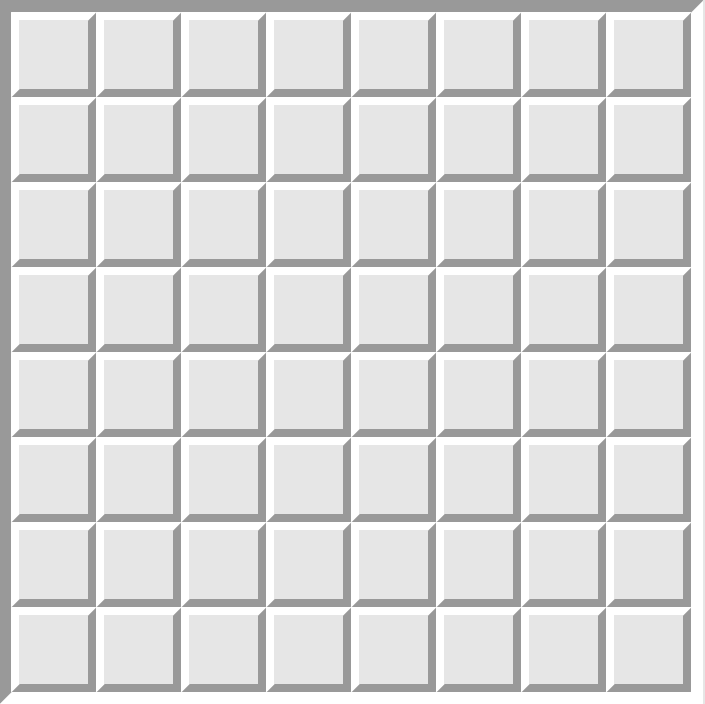

In [36]:
display.Image("/content/MS1.png",width=300,height=300)

In [37]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(1, 1):Unknown
(1, 2):Unknown
(1, 3):Unknown
(1, 4):Unknown
(1, 5):Unknown
(1, 6):Unknown
(1, 7):Unknown
(1, 8):Unknown
(2, 1):Unknown
(2, 2):Unknown
(2, 3):Unknown
(2, 4):Unknown
(2, 5):Unknown
(2, 6):Unknown
(2, 7):Unknown
(2, 8):Unknown
(3, 1):Unknown
(3, 2):Unknown
(3, 3):Unknown
(3, 4):Unknown
(3, 5):Unknown
(3, 6):Unknown
(3, 7):Unknown
(3, 8):Unknown
(4, 1):Unknown
(4, 2):Unknown
(4, 3):Unknown
(4, 4):Unknown
(4, 5):Unknown
(4, 6):Unknown
(4, 7):Unknown
(4, 8):Unknown
(5, 1):Unknown
(5, 2):Unknown
(5, 3):Unknown
(5, 4):Unknown
(5, 5):Unknown
(5, 6):Unknown
(5, 7):Unknown
(5, 8):Unknown
(6, 1):Unknown
(6, 2):Unknown
(6, 3):Unknown
(6, 4):Unknown
(6, 5):Unknown
(6, 6):Unknown
(6, 7):Unknown
(6, 8):Unknown
(7, 1):Unknown
(7, 2):Unknown
(7, 3):Unknown
(7, 4):Unknown
(7, 5):Unknown
(7, 6):Unknown
(7, 7):Unknown
(7, 8):Unknown
(8, 1):Unknown
(8, 2):Unknown
(8, 3):Unknown
(8, 4):Unknown
(8, 5):Unknown
(8, 6):Unknown
(8, 7):Unknown
(8, 8):Unknown
Cells Are All Unknown. Let's Make a Rand

$$Let's \: choose \: the \: cell \: (1,1) \: randomly \: and \: obtain \: the \: new \: configuration:$$

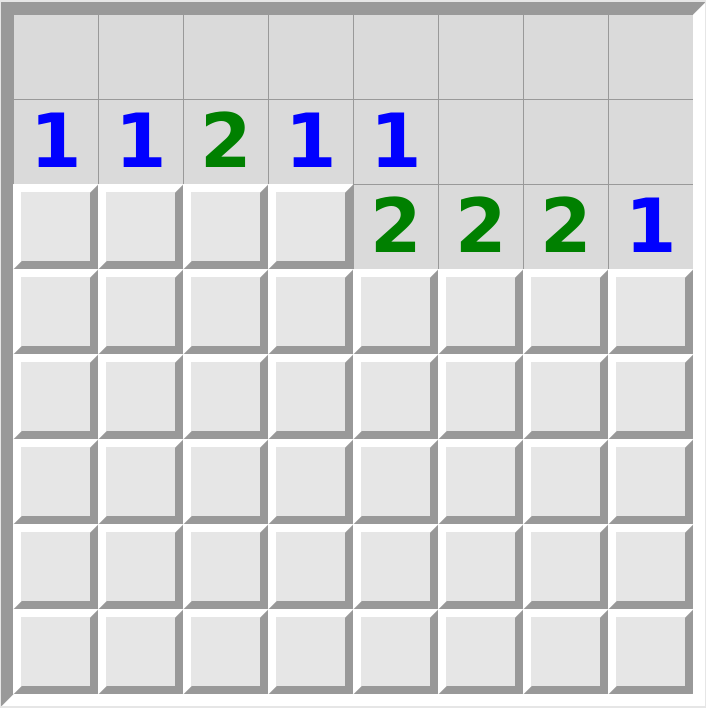

In [38]:
display.Image("/content/MS2.png",width=300,height=300)

In [39]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, YY, YY, YY, YY, I2, I2, I2, I1, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(3, 1):Safe
(3, 2):Bomb
(3, 3):Safe
(3, 4):Bomb
(4, 1):Unknown
(4, 2):Unknown
(4, 3):Unknown
(4, 4):Safe
(4, 5):Safe
(4, 6):Bomb
(4, 7):Bomb
(4, 8):Safe
(5, 1):Unknown
(5, 2):Unknown
(5, 3):Unknown
(5, 4):Unknown
(5, 5):Unknown
(5, 6):Unknown
(5, 7):Unknown
(5, 8):Unknown
(6, 1):Unknown
(6, 2):Unknown
(6, 3):Unknown
(6, 4):Unknown
(6, 5):Unknown
(6, 6):Unknown
(6, 7):Unknown
(6, 8):Unknown
(7, 1):Unknown
(7, 2):Unknown
(7, 3):Unknown
(7, 4):Unknown
(7, 5):Unknown
(7, 6):Unknown
(7, 7):Unknown
(7, 8):Unknown
(8, 1):Unknown
(8, 2):Unknown
(8, 3):Unknown
(8, 4):Unknown
(8, 5):Unknown
(8, 6):Unknown
(8, 7):Unknown
(8, 8):Unknown


$$Let's \: flag \: the \: bombs \: and \: select \: safe \: cells:$$

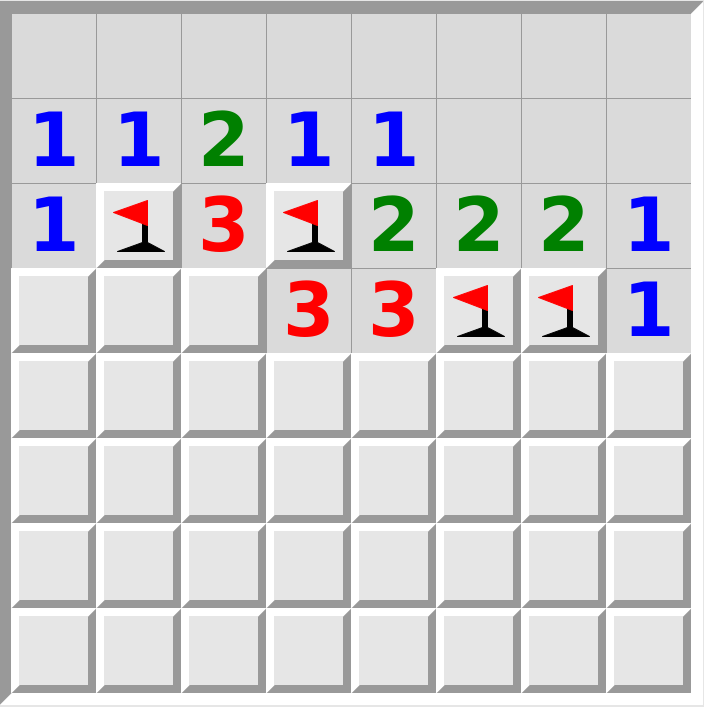

In [40]:
display.Image("/content/MS3.png",width=300,height=300)

In [41]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, I1, BB, I3, BB, I2, I2, I2, I1, XX],
                  [XX, YY, YY, YY, I3, I3, BB, BB, I1, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(4, 1):Safe
(4, 2):Safe
(4, 3):Bomb
(5, 1):Unknown
(5, 2):Unknown
(5, 3):Unknown
(5, 4):Unknown
(5, 5):Unknown
(5, 6):Unknown
(5, 7):Safe
(5, 8):Safe
(6, 1):Unknown
(6, 2):Unknown
(6, 3):Unknown
(6, 4):Unknown
(6, 5):Unknown
(6, 6):Unknown
(6, 7):Unknown
(6, 8):Unknown
(7, 1):Unknown
(7, 2):Unknown
(7, 3):Unknown
(7, 4):Unknown
(7, 5):Unknown
(7, 6):Unknown
(7, 7):Unknown
(7, 8):Unknown
(8, 1):Unknown
(8, 2):Unknown
(8, 3):Unknown
(8, 4):Unknown
(8, 5):Unknown
(8, 6):Unknown
(8, 7):Unknown
(8, 8):Unknown


$$Let's \: flag \: the \: bombs \: and \: select \: safe \: cells:$$

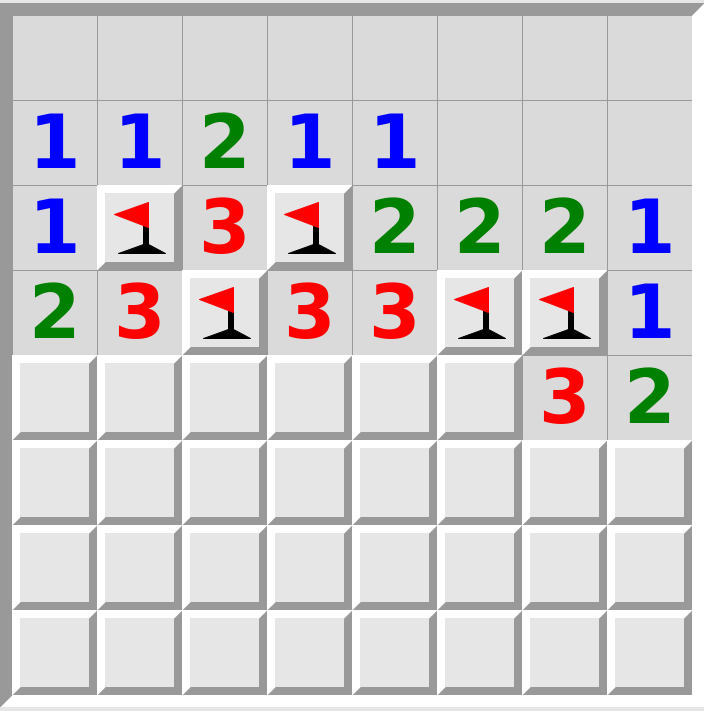

In [42]:
display.Image("/content/MS4.png",width=300,height=300)

In [43]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, I1, BB, I3, BB, I2, I2, I2, I1, XX],
                  [XX, I2, I3, BB, I3, I3, BB, BB, I1, XX],
                  [XX, YY, YY, YY, YY, YY, YY, I3, I2, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(5, 1):Unknown
(5, 2):Unknown
(5, 3):Safe
(5, 4):Unknown
(5, 5):Unknown
(5, 6):Safe
(6, 1):Unknown
(6, 2):Unknown
(6, 3):Unknown
(6, 4):Unknown
(6, 5):Unknown
(6, 6):Safe
(6, 7):Unknown
(6, 8):Unknown
(7, 1):Unknown
(7, 2):Unknown
(7, 3):Unknown
(7, 4):Unknown
(7, 5):Unknown
(7, 6):Unknown
(7, 7):Unknown
(7, 8):Unknown
(8, 1):Unknown
(8, 2):Unknown
(8, 3):Unknown
(8, 4):Unknown
(8, 5):Unknown
(8, 6):Unknown
(8, 7):Unknown
(8, 8):Unknown


$$Since \: there \: is \: no \: bomb \: detected, \: let's \: just \: select \: safe \: cells:$$

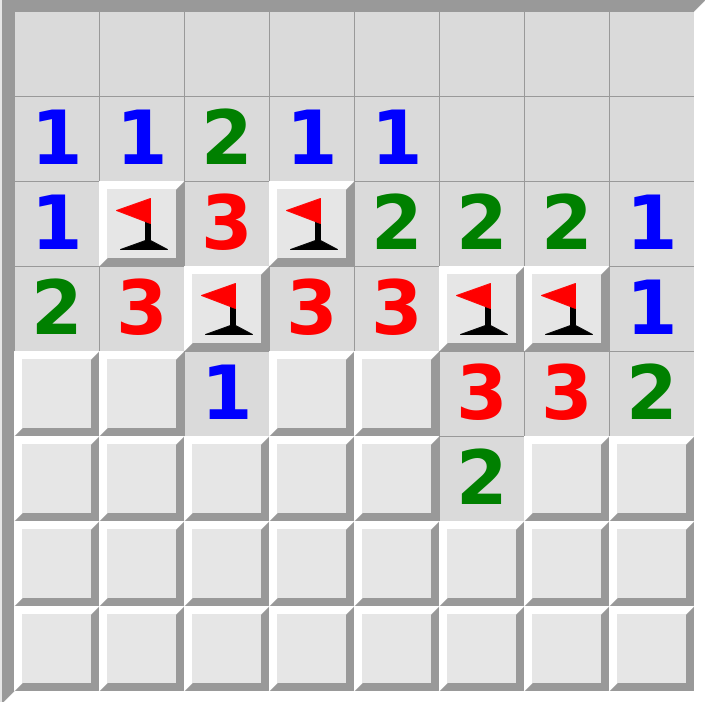

In [44]:
display.Image("/content/MS5.png",width=300,height=300)

In [45]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, I1, BB, I3, BB, I2, I2, I2, I1, XX],
                  [XX, I2, I3, BB, I3, I3, BB, BB, I1, XX],
                  [XX, YY, YY, I1, YY, YY, I3, I3, I2, XX],
                  [XX, YY, YY, YY, YY, YY, I2, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(5, 1):Bomb
(5, 2):Safe
(5, 4):Safe
(5, 5):Bomb
(6, 1):Unknown
(6, 2):Safe
(6, 3):Safe
(6, 4):Safe
(6, 5):Safe
(6, 7):Safe
(6, 8):Bomb
(7, 1):Unknown
(7, 2):Unknown
(7, 3):Unknown
(7, 4):Unknown
(7, 5):Unknown
(7, 6):Unknown
(7, 7):Unknown
(7, 8):Unknown
(8, 1):Unknown
(8, 2):Unknown
(8, 3):Unknown
(8, 4):Unknown
(8, 5):Unknown
(8, 6):Unknown
(8, 7):Unknown
(8, 8):Unknown


$$Let's \: flag \: the \: bombs \: and \: select \: safe \: cells:$$

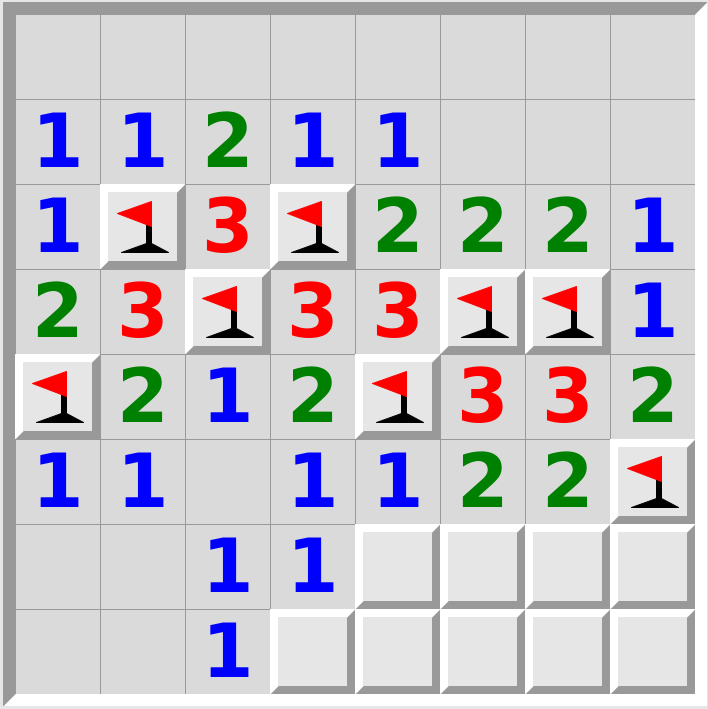

In [46]:
display.Image("/content/MS6.png",width=300,height=300)

In [47]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, I1, BB, I3, BB, I2, I2, I2, I1, XX],
                  [XX, I2, I3, BB, I3, I3, BB, BB, I1, XX],
                  [XX, BB, I2, I1, I2, BB, I3, I3, I2, XX],
                  [XX, I1, I1, I0, I1, I1, I2, I2, BB, XX],
                  [XX, I0, I0, I1, I1, YY, YY, YY, YY, XX],
                  [XX, I0, I0, I1, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(7, 5):Safe
(7, 6):Safe
(7, 7):Bomb
(7, 8):Safe
(8, 4):Bomb
(8, 5):Safe
(8, 6):Unknown
(8, 7):Unknown
(8, 8):Unknown


$$Let's \: flag \: the \: bombs \: and \: select \: safe \: cells:$$

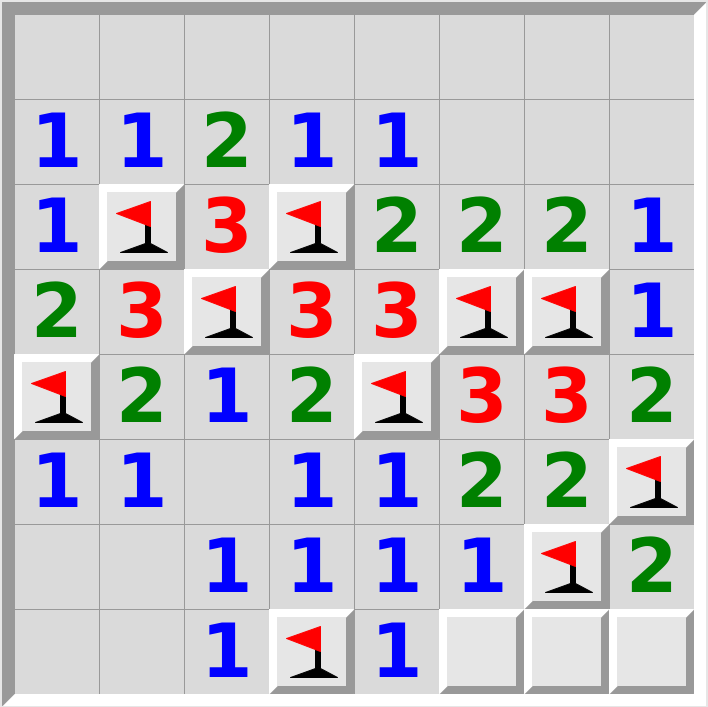

In [48]:
display.Image("/content/MS7.png",width=300,height=300)

In [49]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, I1, BB, I3, BB, I2, I2, I2, I1, XX],
                  [XX, I2, I3, BB, I3, I3, BB, BB, I1, XX],
                  [XX, BB, I2, I1, I2, BB, I3, I3, I2, XX],
                  [XX, I1, I1, I0, I1, I1, I2, I2, BB, XX],
                  [XX, I0, I0, I1, I1, I1, I1, BB, I2, XX],
                  [XX, I0, I0, I1, BB, I1, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

(8, 6):Safe
(8, 7):Safe
(8, 8):Safe


$$Let's \: select \: the \: safe \: cells \: and \: win \: the \: game...$$

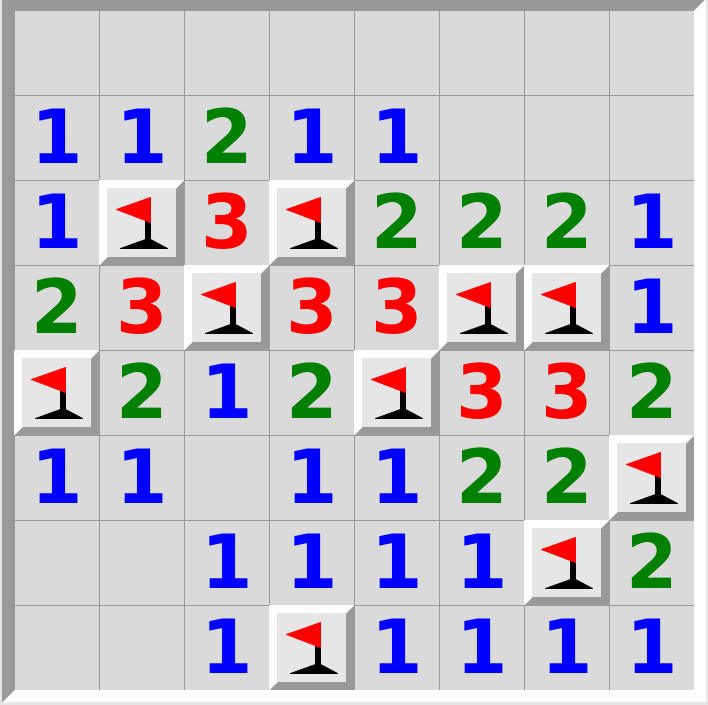

In [50]:
display.Image("/content/MS8.png",width=300,height=300)

In [51]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, I0, I0, I0, I0, I0, I0, I0, I0, XX],
                  [XX, I1, I1, I2, I1, I1, I0, I0, I0, XX],
                  [XX, I1, BB, I3, BB, I2, I2, I2, I1, XX],
                  [XX, I2, I3, BB, I3, I3, BB, BB, I1, XX],
                  [XX, BB, I2, I1, I2, BB, I3, I3, I2, XX],
                  [XX, I1, I1, I0, I1, I1, I2, I2, BB, XX],
                  [XX, I0, I0, I1, I1, I1, I1, BB, I2, XX],
                  [XX, I0, I0, I1, BB, I1, I1, I1, I1, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]
STATUS = cell_discovery(initial_matrix)

You win...


#Part 2: Automatic Playing

##$$Game \: environment \: simulation:$$

In [345]:
def show(G):
  P = [[None for _ in range(length)] for _ in range(length)]
  for i in range(len(P)):
    for j in range(len(P)):
      P[i][j] = G[i][j]
      if P[i][j] == 10:
        P[i][j] = emoji.emojize(":triangular_flag:")
      if i==0 or i==n+1 or j==0 or j==n+1:
        P[i][j] = emoji.emojize(":cross_mark:")
  return P

In [346]:
game = [[None for _ in range(length)] for _ in range(length)]
number_of_bombs = 10
pairToDecimal = {(i,j):(i-1)*(n) + j for i in range(1,n+1) for j in range(1,n+1)} 
decimalToPair = {v:k for (k, v) in pairToDecimal.items()}

bomb_cells = random.sample(list(decimalToPair.keys()), number_of_bombs)
for bmb in bomb_cells:
  rx, ry = decimalToPair[bmb]
  game[rx][ry] = BB

In [347]:
print(Fore.GREEN + tabulate(show(game), tablefmt="fancy_grid"))

╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │ 🚩 │    │    │    │ 🚩 │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │ 🚩 │    │ 🚩 │    │    │ 🚩 │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │ 🚩 │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 🚩 │    │    │ 🚩 │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │ 🚩 │    │ 🚩 │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧

In [348]:
adjacents = {}
for i in range(1, len(game)-1):
  for j in range(1,len(game)-1):
    if game[i][j] != 10:
      counter = 0
      for xadj in range(i-1,i+2):
        for yadj in range(j-1,j+2):
          if game[xadj][yadj] == 10:
            counter += 1
      game[i][j] = counter

In [349]:
print(Fore.GREEN + tabulate(show(game), tablefmt="fancy_grid"))

╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 1  │ 🚩 │ 1  │ 0  │ 1  │ 🚩 │ 1  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 1  │ 2  │ 3  │ 2  │ 1  │ 2  │ 2  │ 2  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 2  │ 🚩 │ 3  │ 🚩 │ 1  │ 1  │ 🚩 │ 1  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 3  │ 🚩 │ 4  │ 2  │ 2  │ 1  │ 1  │ 1  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 🚩 │ 2  │ 2  │ 🚩 │ 1  │ 0  │ 0  │ 0  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 1  │ 1  │ 1  │ 1  │ 1  │ 0  │ 0  │ 0  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 0  │ 0  │ 0  │ 1  │ 1  │ 2  │ 1  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ 0  │ 0  │ 0  │ 0  │ 1  │ 🚩 │ 2  │ 🚩 │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
╘════╧

In [350]:
STATUS = cell_discovery(game)

You win...


##$$Next \: configuration \: generator:$$

In [351]:
def generate_new_configuration(initial_matrix, status):
  safes = [key for key in status if status[key]=='Safe']
  bombs = [key for key in status if status[key]=='Bomb']
  for sf_idx in safes:
    initial_matrix[sf_idx[0]][sf_idx[1]] = game[sf_idx[0]][sf_idx[1]]
    if game[sf_idx[0]][sf_idx[1]] == BB:
      print(Fore.RED + "you lose...")
      return (False,initial_matrix)
  for bmb_idx in bombs:
    initial_matrix[bmb_idx[0]][bmb_idx[1]] = BB
  return (True,initial_matrix)

##$$Playing \: the \: game \: automatically:$$

In [354]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]

In [355]:
while True:
  STATUS = cell_discovery(initial_matrix,verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (3, 8) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │ 1  │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │


In [356]:
initial_matrix == game

True

##$$Test \: on \: a \: real \: one:$$

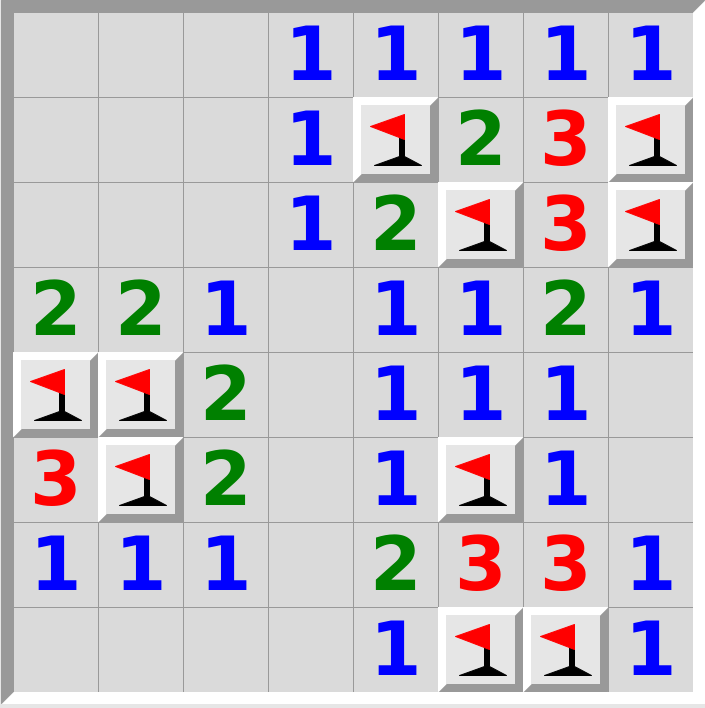

In [364]:
display.Image("/content/MS9.png", width=300, height=300)

In [365]:
game = [
        [None for i in range(length)],
        [None,0,0,0,1,1,1,1,1,None],
        [None,0,0,0,1,10,2,3,10,None],
        [None,0,0,0,1,2,10,3,10,None],
        [None,2,2,1,0,1,1,2,1,None],
        [None,10,10,2,0,1,1,1,0,None],
        [None,3,10,2,0,1,10,1,0,None],
        [None,1,1,1,0,2,3,3,1,None],
        [None,0,0,0,0,1,10,10,1,None],
        [None for i in range(length)]
]

In [366]:
initial_matrix = [
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, YY, YY, YY, YY, YY, YY, YY, YY, XX],
                  [XX, XX, XX, XX, XX, XX, XX, XX, XX, XX]
                  ]

In [367]:
while True:
  STATUS = cell_discovery(initial_matrix,verbose=False)
  if not STATUS:
    A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
    break
  if set(list(STATUS.values())) == {"Unknown"}:
    rcell = random.sample(list(STATUS.keys()),1)[0]
    STATUS[rcell] = "Safe"
    print(Fore.BLUE + f"cell {rcell} was selected randomly...")
    
  A, initial_matrix = generate_new_configuration(initial_matrix, STATUS)
  if not A:
    break
  print(Fore.BLUE + tabulate(show(initial_matrix), tablefmt="fancy_grid"), end="\n")

Cells Are All Unknown. Let's Make a Random Choice...
cell (2, 3) was selected randomly...
╒════╤════╤════╤════╤════╤════╤════╤════╤════╤════╕
│ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │ 0  │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │
├────┼────┼────┼────┼────┼────┼────┼────┼────┼────┤
│ ❌ │    │    │    │    │    │    │    │    │ ❌ │


In [368]:
initial_matrix == game

True